<a href="https://colab.research.google.com/github/HatimCodeforever/RS_experiments/blob/master/Exp4_RS_60017220097_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter

In [ ]:
dataset = pd.read_excel("Online Retail.xlsx")
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataset.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
dataset1 = dataset.dropna()
dataset1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dataset1= dataset1[dataset1.Quantity > 0]
dataset1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
dataset1['Amount'] = dataset1['Quantity'] * dataset1['UnitPrice']
orders = dataset1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
print('The TOP 5 loyal customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 loyal customers with most number of orders...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


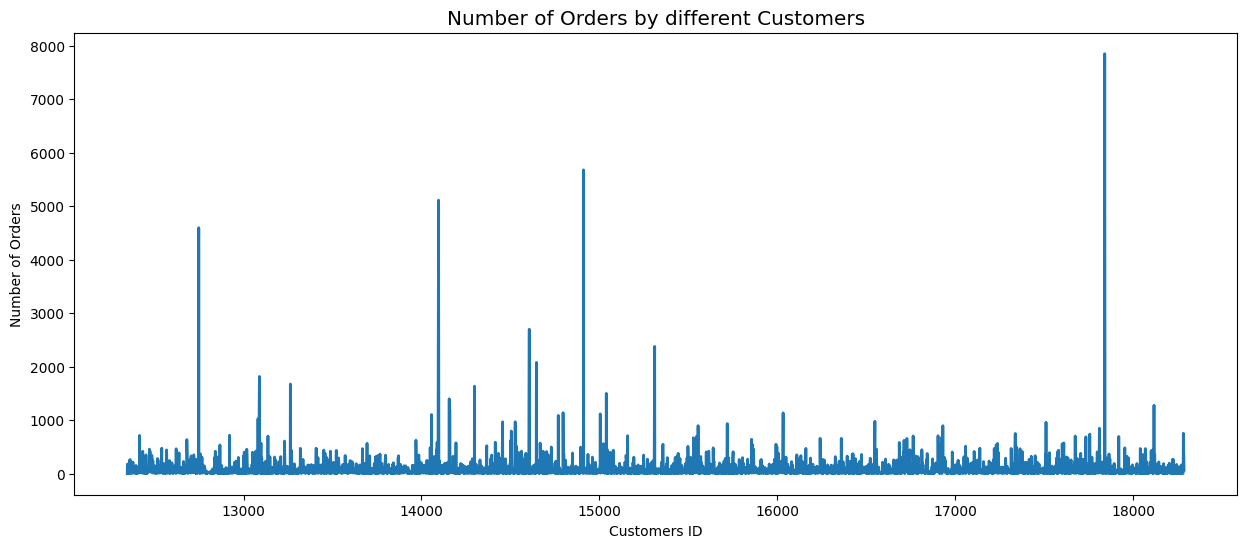

In [ ]:
plt.subplots(figsize=(15,6))
plt.style.use('bmh')
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by different Customers')
plt.show()

In [ ]:
money = dataset1.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()
print('The TOP 5 profitable customers with highest money spent...')
money.sort_values(by='Amount', ascending=False).head()

The TOP 5 profitable customers with highest money spent...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


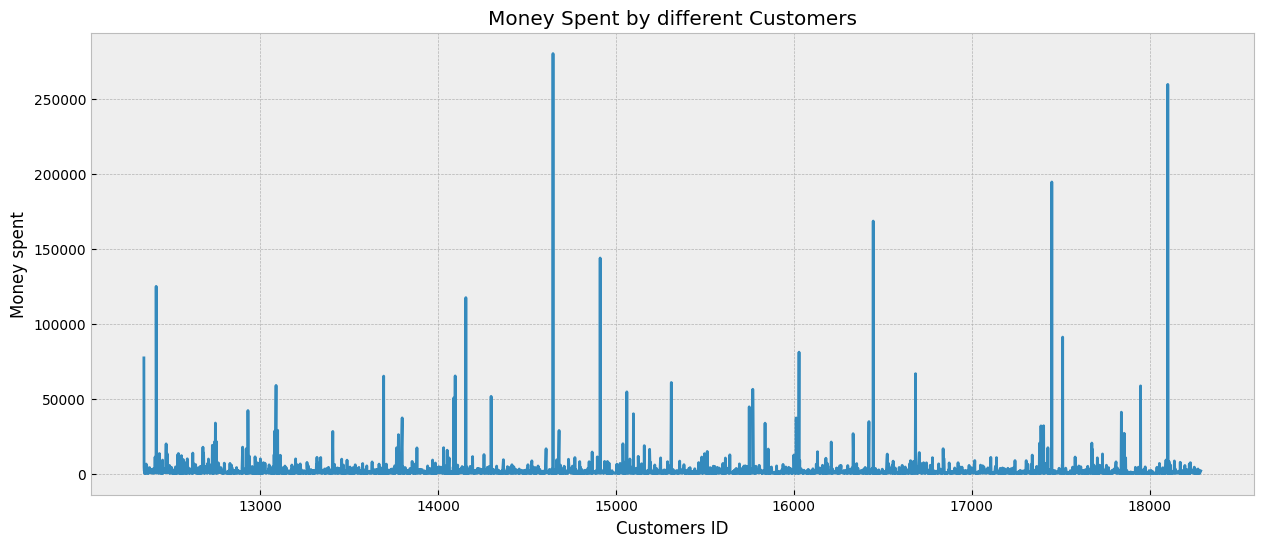

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(money.CustomerID, money.Amount)
plt.style.use('bmh')
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent by different Customers')
plt.show()

In [ ]:
# Convert InvoiceDate from object to datetime
dataset1['InvoiceDate'] = pd.to_datetime(dataset.InvoiceDate, format='%m/%d/%Y %H:%M')
# Creating a new feature called year_month, such that December 2010 will be denoted as 201012
dataset1.insert(loc=2, column='year_month', value=dataset1['InvoiceDate'].map(lambda x: 100*x.year + x.month))
# Creating a new feature for Month
dataset1.insert(loc=3, column='month', value=dataset1.InvoiceDate.dt.month)
# Creating a new feature for Day
# +1 to make Monday=1.....until Sunday=7
dataset1.insert(loc=4, column='day', value=(dataset1.InvoiceDate.dt.dayofweek)+1)
# Creating a new feature for Hour
dataset1.insert(loc=5, column='hour', value=dataset1.InvoiceDate.dt.hour)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


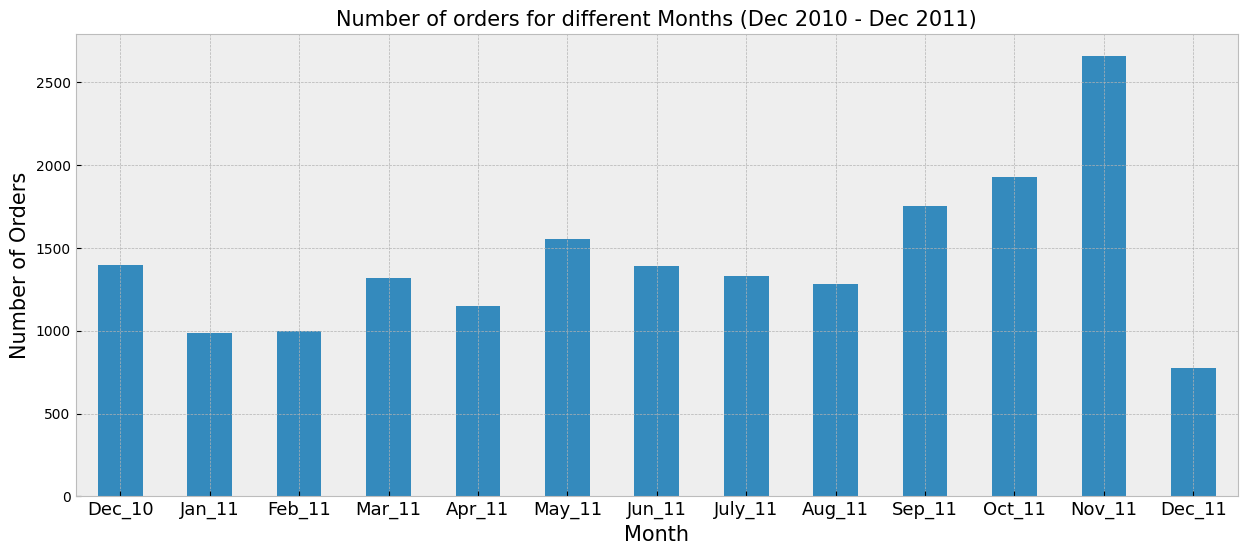

In [ ]:
plt.style.use('bmh')
# Using groupby to extract No. of Invoices year-monthwise
ax = dataset1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=15)
# Providing with X tick labels
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


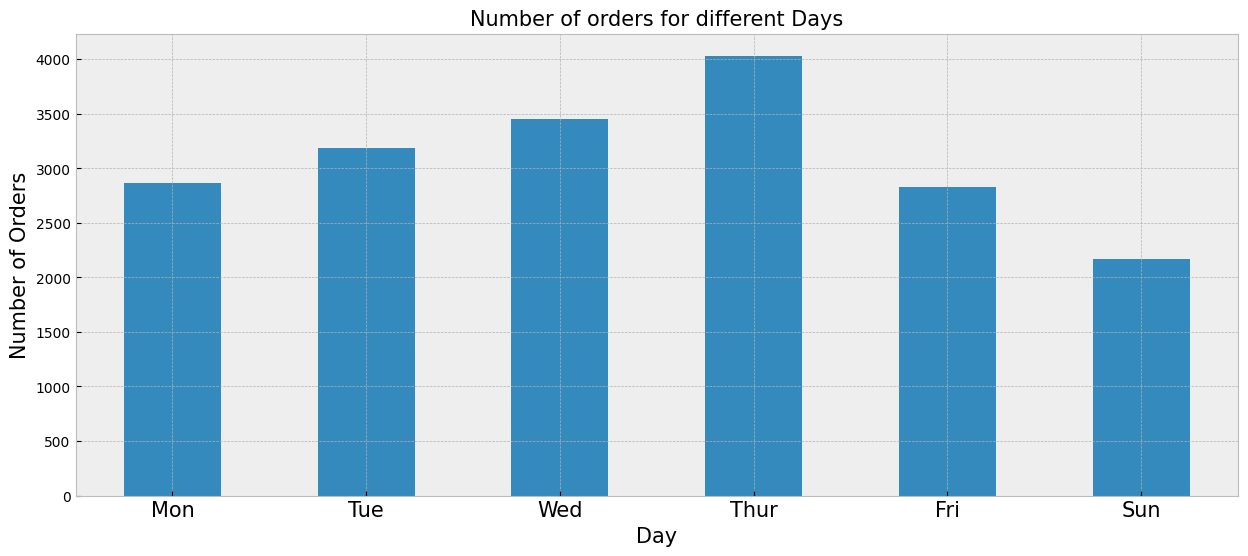

In [ ]:
# Using groupby to count no. of Invoices daywise
ax = dataset1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
# Giving suitable title to the plot
ax.set_title('Number of orders for different Days', fontsize=15)
# Since there are no orders placed on Saturdays, we are excluding Sat from xticklabels
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


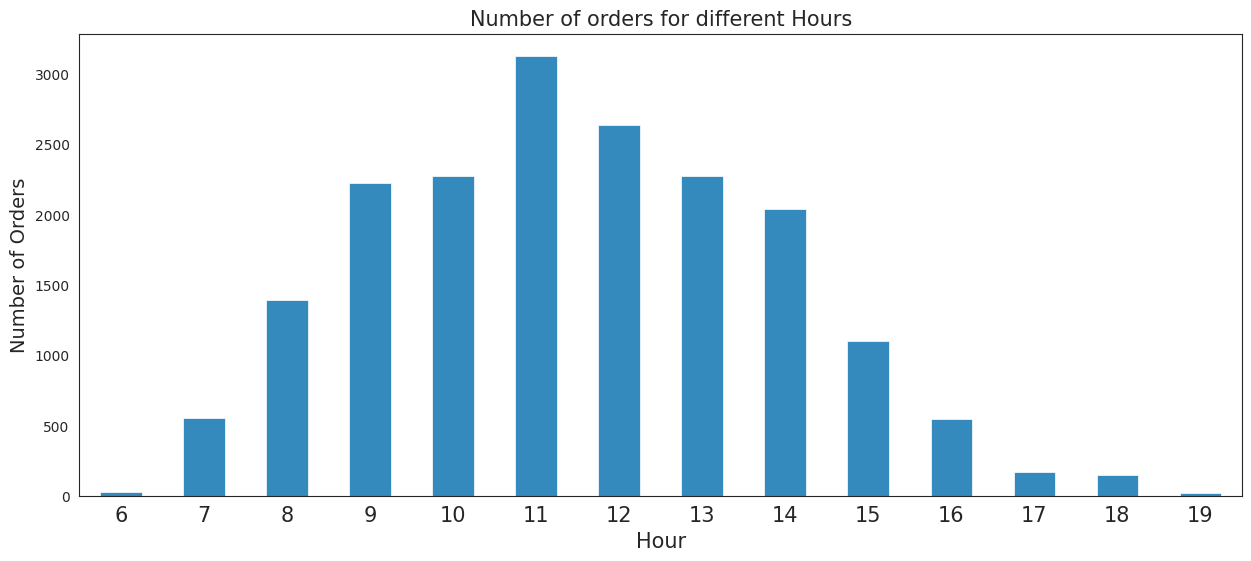

In [ ]:
# Using groupby to count the no. of Invoices hourwise
ax = dataset1.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-2].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=14)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,20), rotation='horizontal', fontsize=15)
plt.show()

In [ ]:
dataset1.UnitPrice.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


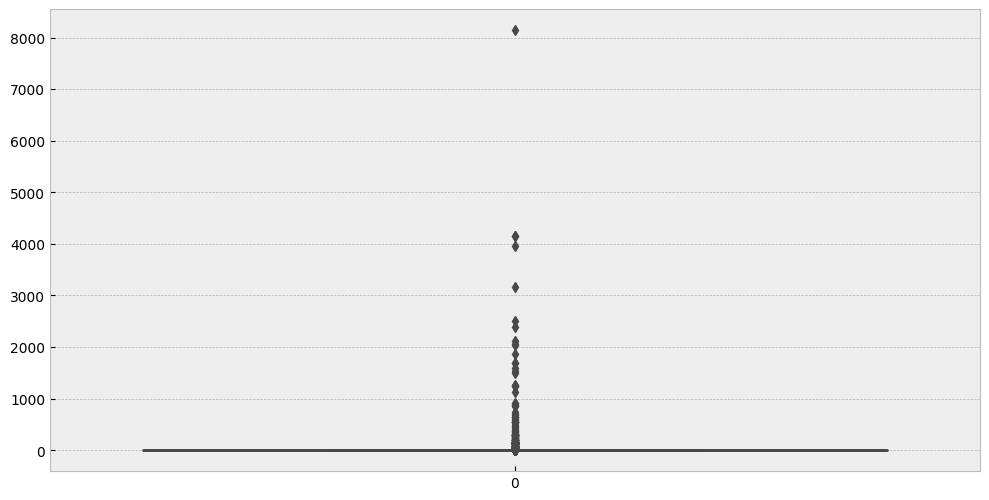

In [ ]:
# checking the distribution of unit price
plt.subplots(figsize=(12,6))
# Using darkgrid style for better visualization
sns.set_style('darkgrid')
# Applying boxplot visualization on Unit Price
sns.boxplot(dataset1.UnitPrice)
plt.show()

In [ ]:
# Creating a new df of free items
freeproducts = dataset1[dataset1['UnitPrice'] == 0]
freeproducts.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


In [ ]:
# Counting how many free items were given out year-month wise
freeproducts.year_month.value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


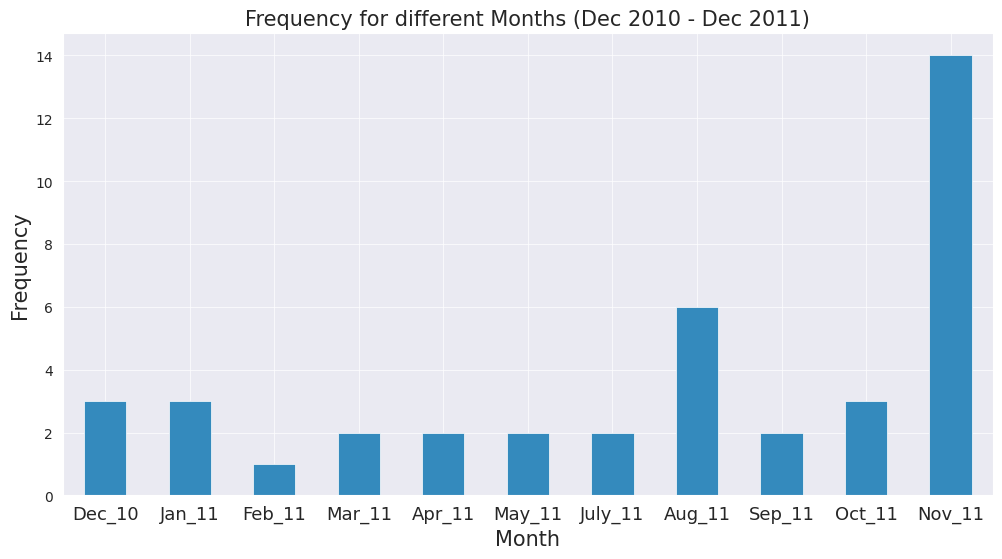

In [ ]:
# Counting how many free items were given out year-month wise
ax = freeproducts.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
# Since there are 0 free items in June 2011, we are excluding it
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


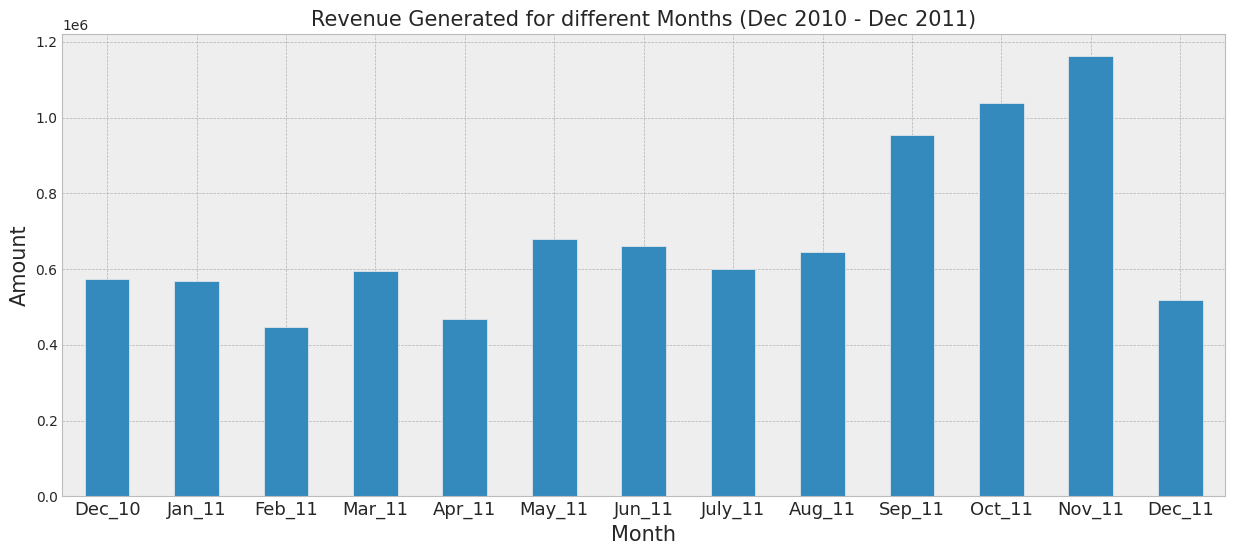

In [ ]:
plt.style.use('bmh')
# Using groupby to sum the amount spent year-month wise
ax = dataset1.groupby('year_month')['Amount'].sum().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Amount',fontsize=15)
ax.set_title('Revenue Generated for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

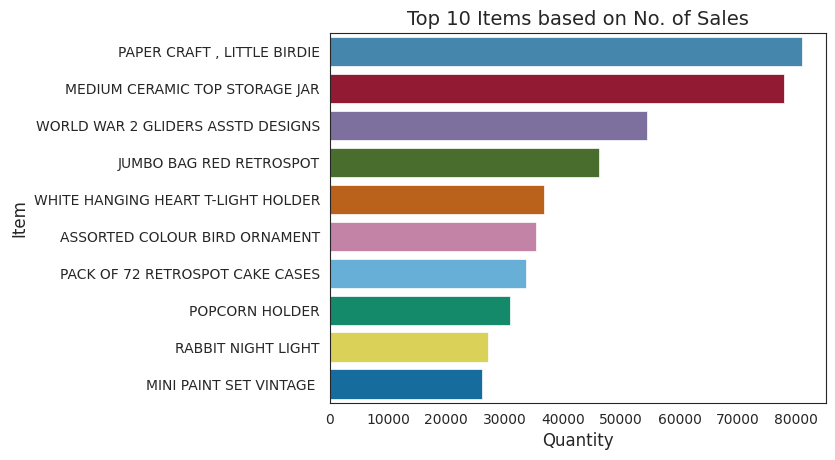

In [ ]:
# Creating a new pivot table which sums the Quantity ordered for each item
most_sold= dataset1.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)
most_sold.reset_index(inplace=True)
sns.set_style('white')
# Creating a bar plot of Description ( or the item ) on the Y axis and the sum of Quantity on the X axis
# We are plotting only the 10 most ordered items
sns.barplot(y='Description', x='Quantity', data=most_sold.head(10))
plt.title('Top 10 Items based on No. of Sales', fontsize=14)
plt.ylabel('Item')

In [ ]:
# choosing WHITE HANGING HEART T-LIGHT HOLDER as a sample
d_white = dataset1[dataset1['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# WHITE HANGING HEART T-LIGHT HOLDER has been ordered 2028 times
d_white.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2028, 13)

In [ ]:
# WHITE HANGING HEART T-LIGHT HOLDER has been ordered by 856 customers
len(d_white.CustomerID.unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


856

In [ ]:
# Creating a pivot table that displays the sum of unique Customers who bought particular item

most_customers = dataset1.pivot_table(index=['StockCode','Description'], values='CustomerID', aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)
most_customers
# Since the count for WHITE HANGING HEART T-LIGHT HOLDER matches above length 856, the pivot table looks correct for all items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,CustomerID
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,881
85123A,WHITE HANGING HEART T-LIGHT HOLDER,856
47566,PARTY BUNTING,708
84879,ASSORTED COLOUR BIRD ORNAMENT,678
22720,SET OF 3 CAKE TINS PANTRY DESIGN,640
...,...,...
35916B,BLUE FELT HANGING HEART WITH FLOWER,1
90036F,"FLOWER GLASS GARLD NECKL36""TURQUOIS",1
90037B,TINY CRYSTAL BRACELET GREEN,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

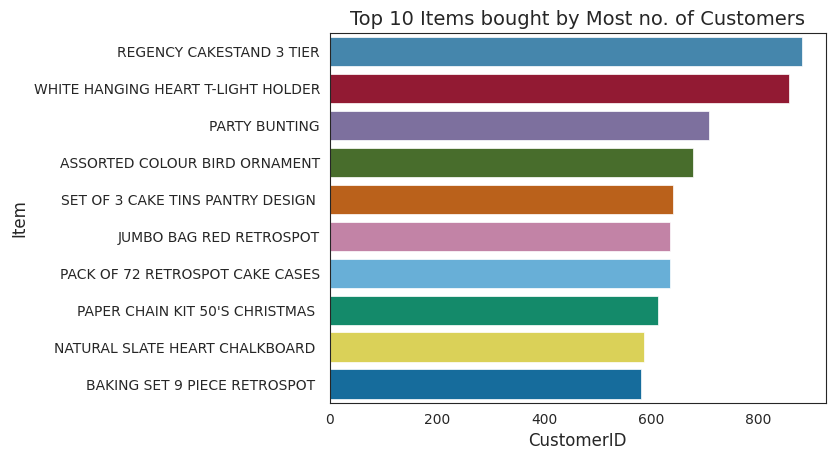

In [ ]:
most_customers.reset_index(inplace=True)
sns.set_style('white')
# Creating a bar plot of Description ( or the item ) on the Y axis and the sum of unique Customers on the X axis
# We are plotting only the 10 most bought items
sns.barplot(y='Description', x='CustomerID', data=most_customers.head(10))
# Giving suitable title to the plot
plt.title('Top 10 Items bought by Most no. of Customers', fontsize=14)
plt.ylabel('Item')

In [ ]:
dataset1['items'] = dataset1['Description'].str.replace(' ', '_')
# Storing all the invoice numbers into a list y
y = dataset1['InvoiceNo']
y = y.to_list()
# Using set function to find unique invoice numbers only and storing them in invoices list
invoices = list(set(y))
# Creating empty list first_choices
firstchoices = []
# looping into list of unique invoice numbers
for i in invoices:
    # the first item (index = 0) of every invoice is the first purchase
    # extracting the item name for the first purchase
    firstpurchase = dataset1[dataset1['InvoiceNo']==i]['items'].reset_index(drop=True)[0]
    # Appending the first purchase name into first choices list
    firstchoices.append(firstpurchase)
firstchoices[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['SET_OF_4_KNICK_KNACK_TINS_DOILEY_',
 'RED_POLKADOT_BEAKER_',
 'SET_OF_TEA_COFFEE_SUGAR_TINS_PANTRY',
 'VINTAGE_KITCHEN_PRINT_PUDDINGS',
 'SCANDINAVIAN_PAISLEY_PICNIC_BAG']

In [ ]:
# Using counter to count repeating first choices
count = Counter(firstchoices)
# Storing the counter into a datafrane
data_first_choices = pd.DataFrame.from_dict(count, orient='index').reset_index()
# Rename columns as item and count
data_first_choices.rename(columns={'index':'item', 0:'count'},inplace=True)
# Sorting the data based on count
data_first_choices.sort_values(by='count',ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,item,count
33,REGENCY_CAKESTAND_3_TIER,203
7,WHITE_HANGING_HEART_T-LIGHT_HOLDER,181
35,RABBIT_NIGHT_LIGHT,155
17,PARTY_BUNTING,122
390,Manual,119
...,...,...
1935,SQUARE_MINI_PORTRAIT_FRAME,1
1936,SWALLOW_WOODEN_CHRISTMAS_DECORATION,1
1937,AMBER_GLASS_TASSLE_BAG_CHARM,1
1942,RED_RETROSPOT_LUGGAGE_TAG,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

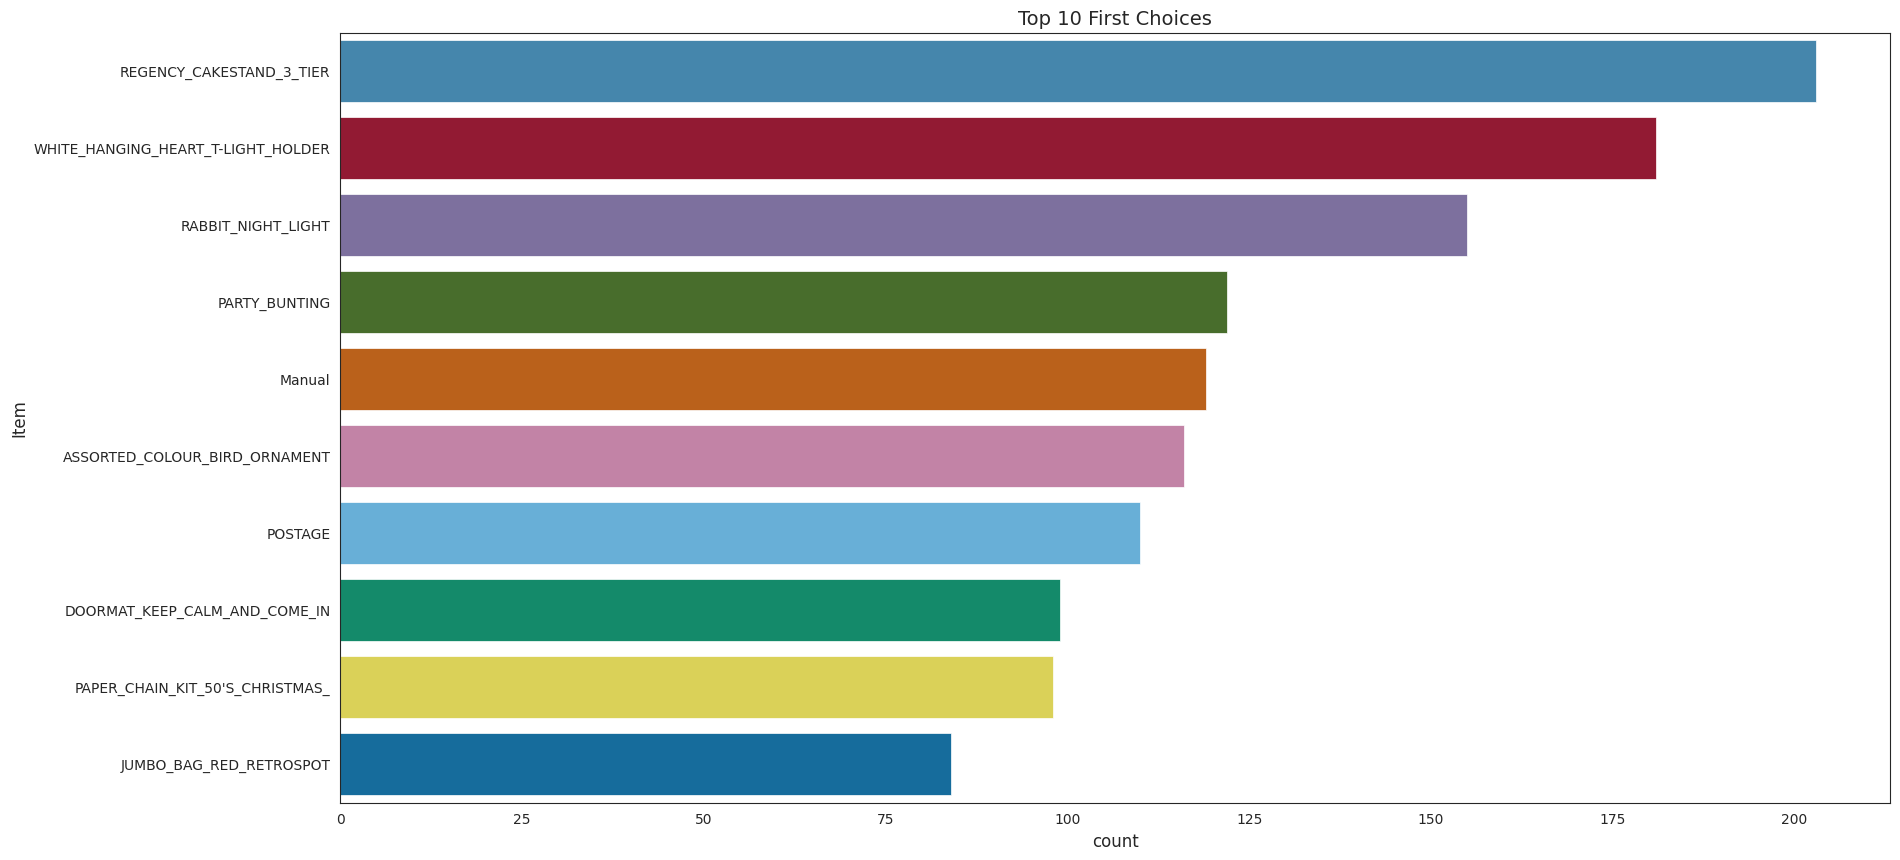

In [ ]:
plt.subplots(figsize=(20,10))
sns.set_style('white')
# Creating a bar plot that displays Item name on the Y axis and Count on the X axis
sns.barplot(y='item', x='count', data=data_first_choices.sort_values(by='count',ascending=False).head(10))
# Giving suitable title to the plot
plt.title('Top 10 First Choices', fontsize=14)
plt.ylabel('Item')

In [ ]:
basket = (dataset1.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_u(x):
  if x < 1:
    return 0
  else:
    return 1

# everything is encoded into 0 and 1
basket = basket.applymap(encode_u)
basket.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# trying out on a sample item
wooden_star = basket.loc[basket['WOODEN STAR CHRISTMAS SCANDINAVIAN']==1]
# Using apriori algorithm, creating association rules for the sample item
# Applying apriori algorithm for wooden_star
frequentitemsets = apriori(wooden_star, min_support=0.15, use_colnames=True)
# Storing the association rules into rules
wooden_star_rules = association_rules(frequentitemsets, metric="lift", min_threshold=1)
# Sorting the rules on lift and support
wooden_star_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
1,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
2,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN ST...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
3,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
4,(WOODEN TREE CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
5,(WOODEN HEART CHRISTMAS SCANDINAVIAN),"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN ST...",0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
6,(PAPER CHAIN KIT 50'S CHRISTMAS ),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.221709,0.736721,0.177829,0.802083,1.088721,0.014492,1.330254,0.104705
7,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.736721,0.221709,0.177829,0.241379,1.088721,0.014492,1.025929,0.309524
8,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, PAPER CHA...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.221709,0.736721,0.177829,0.802083,1.088721,0.014492,1.330254,0.104705
9,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",(PAPER CHAIN KIT 50'S CHRISTMAS ),0.736721,0.221709,0.177829,0.241379,1.088721,0.014492,1.025929,0.309524


In [ ]:
# In other words, it returns the items which are likely to be bought by user because he bought the item passed into function
def frequently_bought_t(item):
    # df of item passed
    item_d = basket.loc[basket[item]==1]
    # Applying apriori algorithm on item df
    frequentitemsets = apriori(item_d, min_support=0.15, use_colnames=True)
    # Storing association rules
    rules = association_rules(frequentitemsets, metric="lift", min_threshold=1)
    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    print('Items frequently bought together with {0}'.format(item))
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequently_bought_t('WOODEN STAR CHRISTMAS SCANDINAVIAN')

Items frequently bought together with WOODEN STAR CHRISTMAS SCANDINAVIAN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({'WOODEN HEART CHRISTMAS SCANDINAVIAN'}),
       frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS "}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN'}),
       frozenset({'SET OF 3 WOODEN HEART DECORATIONS'}),
       frozenset({'SET OF 3 WOODEN SLEIGH DECORATIONS'}),
       frozenset({'SET OF 3 WOODEN STOCKING DECORATION'})], dtype=object)

In [ ]:
frequently_bought_t('JAM MAKING SET WITH JARS')

Items frequently bought together with JAM MAKING SET WITH JARS


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({'JAM MAKING SET WITH JARS'}),
       frozenset({'JAM MAKING SET PRINTED'}),
       frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}),
       frozenset({'RECIPE BOX PANTRY YELLOW DESIGN'}),
       frozenset({'REGENCY CAKESTAND 3 TIER'}),
       frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN '})], dtype=object)